In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
dataset = pd.read_csv('StudentsPerformance.csv')

In [23]:
rows, cols = dataset.shape
print(f'{rows} observaciones y {cols} características')

1000 observaciones y 8 características


In [24]:
dataset.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [25]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## **Inputación de datos en diferente formato**

In [26]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
dataset['test preparation course'] = dataset['test preparation course'].map({'completed': 1, 'none': 0})

In [28]:
dataset.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course         int64
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [29]:
dataset.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75
5,female,group B,associate's degree,standard,0,71,83,78
6,female,group B,some college,standard,1,88,95,92
7,male,group B,some college,free/reduced,0,40,43,39
8,male,group D,high school,free/reduced,1,64,64,67
9,female,group B,high school,free/reduced,0,38,60,50


In [30]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## **Visualizar la distribución de las puntuaciones**

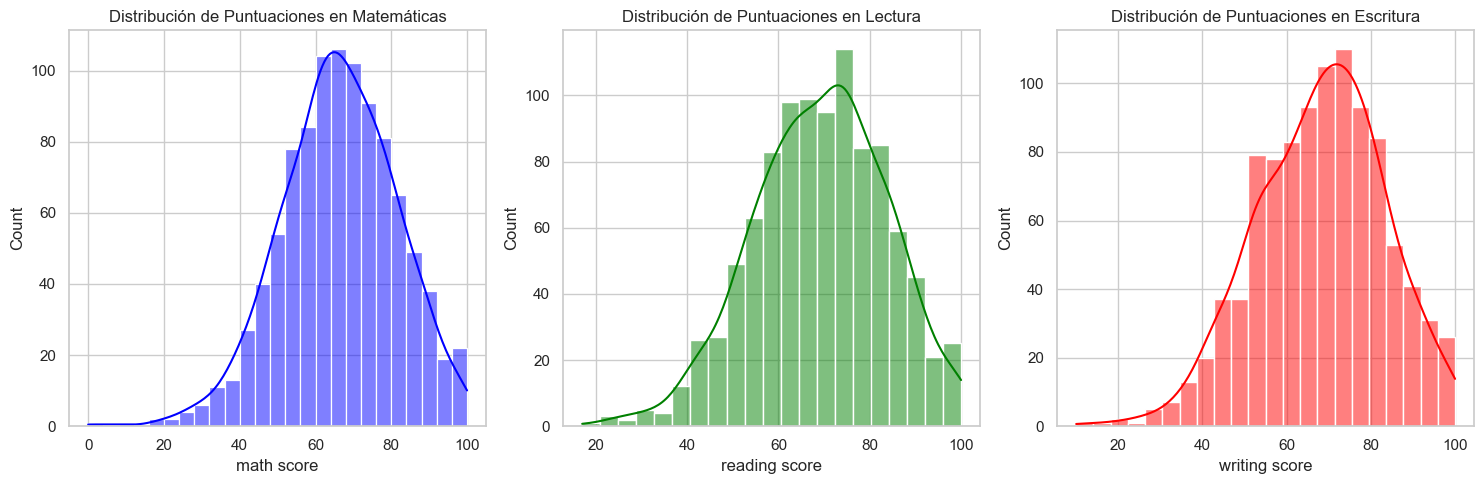

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(dataset['math score'], kde=True, color='blue')
plt.title('Distribución de Puntuaciones en Matemáticas')
plt.subplot(1, 3, 2)
sns.histplot(dataset['reading score'], kde=True, color='green')
plt.title('Distribución de Puntuaciones en Lectura')
plt.subplot(1, 3, 3)
sns.histplot(dataset['writing score'], kde=True, color='red')
plt.title('Distribución de Puntuaciones en Escritura')
plt.tight_layout()
plt.show()

## **Matriz de Correlación**

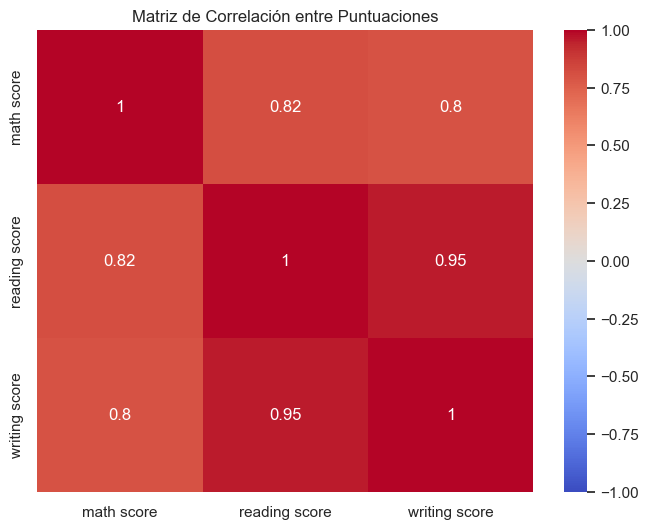

In [32]:
correlation_matrix = dataset[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Puntuaciones')
plt.show()

## **Visualizar la relación entre características y rendimiento**

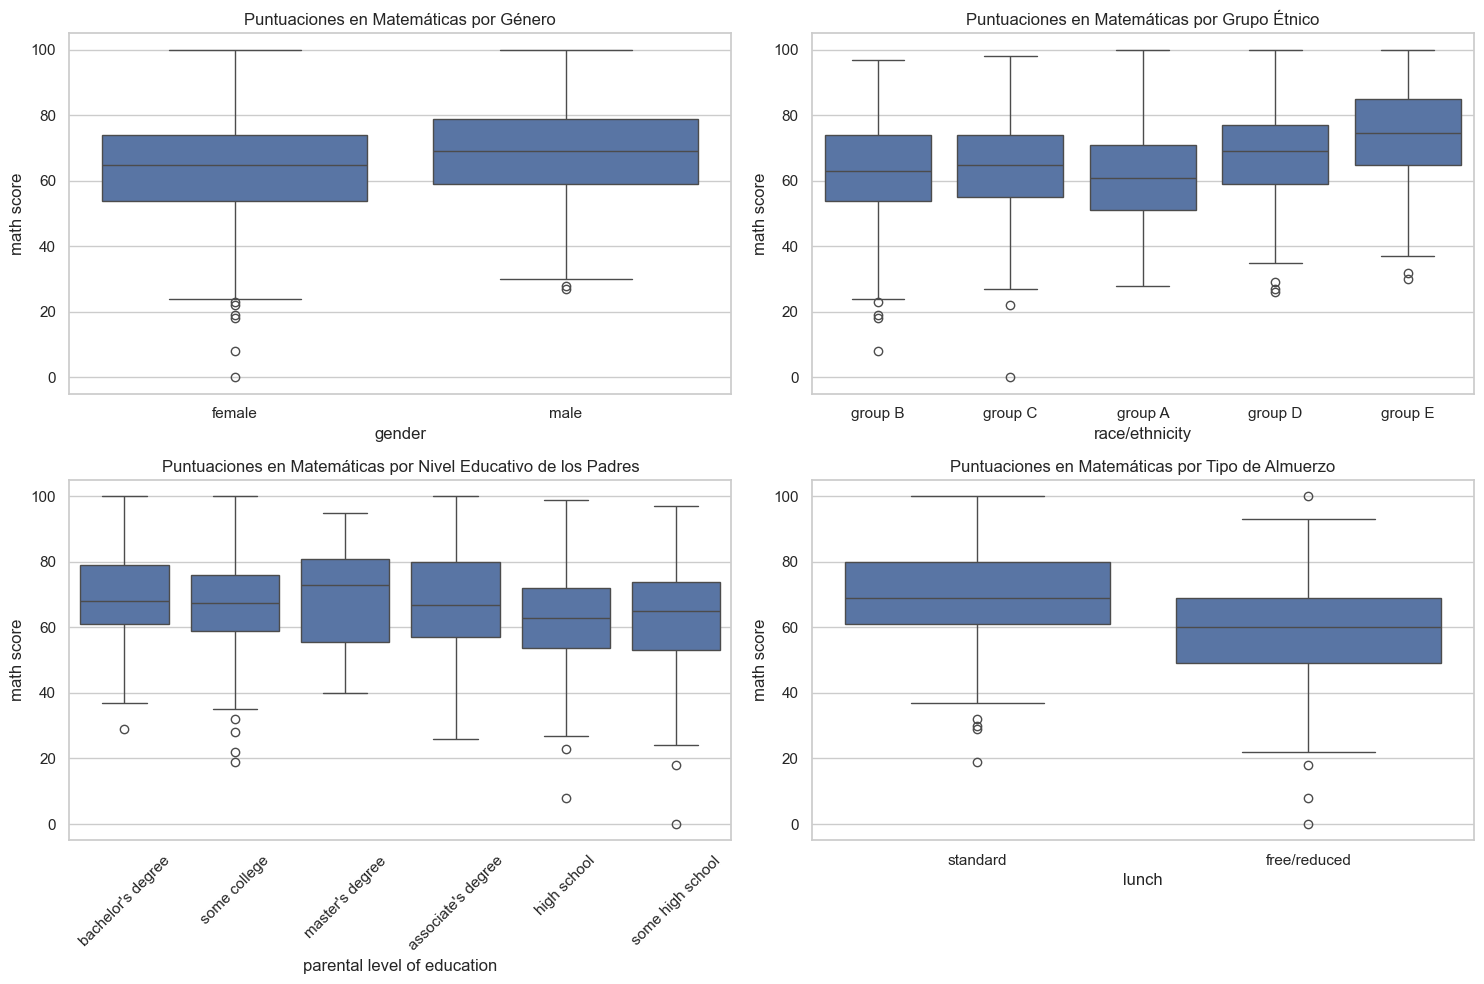

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='gender', y='math score', data=dataset)
plt.title('Puntuaciones en Matemáticas por Género')
plt.subplot(2, 2, 2)
sns.boxplot(x='race/ethnicity', y='math score', data=dataset)
plt.title('Puntuaciones en Matemáticas por Grupo Étnico')
plt.subplot(2, 2, 3)
sns.boxplot(x='parental level of education', y='math score', data=dataset)
plt.title('Puntuaciones en Matemáticas por Nivel Educativo de los Padres')
plt.xticks(rotation=45)
plt.subplot(2, 2, 4)
sns.boxplot(x='lunch', y='math score', data=dataset)
plt.title('Puntuaciones en Matemáticas por Tipo de Almuerzo')
plt.tight_layout()
plt.show()

In [34]:
dataset_dummies = pd.get_dummies(dataset, drop_first=True)

## **Definir variables independientes (X) y dependiente (y)**

In [35]:
X = dataset_dummies.drop('math score', axis=1)
y = dataset_dummies['math score']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modelo de Regresión Lineal**

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## **Evaluación de la regresión lineal**

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 29.095169866715548
Coeficiente de Determinación (R²): 0.8804332983749562


In [39]:
# Coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
coefficients = coefficients.sort_values(by='Coeficiente', ascending=False)
coefficients

,Coeficiente
gender_male,13.064884
race/ethnicity_group E,4.892649
lunch_standard,3.510075
parental level of education_some college,0.998856
parental level of education_high school,0.929312
parental level of education_some high school,0.756470
writing score,0.724148
race/ethnicity_group B,0.359323
reading score,0.236023
race/ethnicity_group D,-0.613236


## **Coeficientes**
- gender_male (Género - Masculino): Un valor positivo indica que los puntajes aumentan para los estudiantes masculinos en comparación con los femeninos en 13.06 unidades.

- race/ethnicity_group E (Grupo Étnico E): Los estudiantes de este grupo étnico tienen puntajes más altos en aproximadamente 4.89 unidades en comparación con el grupo de referencia.

- lunch_standard (Almuerzo - Estándar): Los estudiantes que tienen almuerzos estándar tienen puntajes más altos en aproximadamente 3.51 unidades en comparación con aquellos que tienen almuerzos gratuitos/reducidos.

- parental level of education_some college (Nivel educativo de los padres - Algunos estudios universitarios): Los estudiantes cuyos padres tienen algún nivel de educación universitaria tienen puntajes más altos en aproximadamente 1.00 unidad en comparación con aquellos cuyos padres tienen solo educación de secundaria.

- parental level of education_high school (Nivel educativo de los padres - Escuela secundaria): Los estudiantes cuyos padres tienen educación de secundaria tienen puntajes más altos en aproximadamente 0.93 unidad en comparación con aquellos cuyos padres tienen solo educación de secundaria.

- parental level of education_some high school (Nivel educativo de los padres - Alguna escuela secundaria): Los estudiantes cuyos padres tienen algo de educación de secundaria tienen puntajes más altos en aproximadamente 0.76 unidad en comparación con aquellos cuyos padres tienen solo educación de secundaria.

- writing score (Puntuación de escritura): Cada unidad adicional en la puntuación de escritura está asociada con un aumento de 0.72 unidades en el resultado.

- race/ethnicity_group B (Grupo Étnico B): Los estudiantes de este grupo étnico tienen puntajes más altos en aproximadamente 0.36 unidades en comparación con el grupo de referencia.

- reading score (Puntuación de lectura): Cada unidad adicional en la puntuación de lectura está asociada con un aumento de 0.24 unidades en el resultado.

- race/ethnicity_group D (Grupo Étnico D): Los estudiantes de este grupo étnico tienen puntajes más bajos en aproximadamente -0.61 unidades en comparación con el grupo de referencia.

- race/ethnicity_group C (Grupo Étnico C): Los estudiantes de este grupo étnico tienen puntajes más bajos en aproximadamente -0.63 unidades en comparación con el grupo de referencia.

- parental level of education_bachelor's degree (Nivel educativo de los padres - Licenciatura): Los estudiantes cuyos padres tienen una licenciatura tienen puntajes más bajos en aproximadamente -0.72 unidad en comparación con aquellos cuyos padres tienen solo educación de secundaria.

- parental level of education_master's degree (Nivel educativo de los padres - Maestría): Los estudiantes cuyos padres tienen una maestría tienen puntajes más bajos en aproximadamente -1.40 unidades en comparación con aquellos cuyos padres tienen solo educación de secundaria.

- test preparation course (Curso de preparación para el examen): La realización de un curso de preparación para el examen está asociada con una disminución de aproximadamente -3.29 unidades en el resultado.

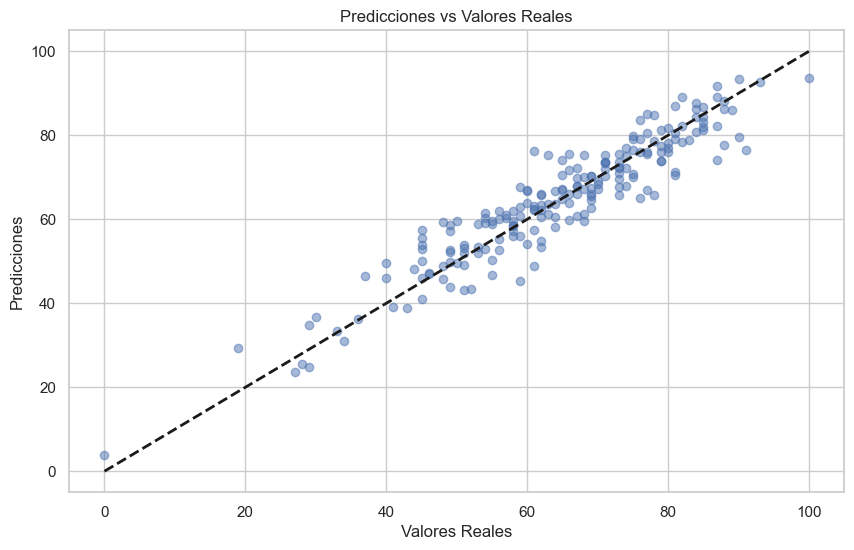

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()